# Proyek Analisis Data: [GYM Member Exercise]
---

**Kelompok 8**

* Nama: Fernando Manuel
* NIM : 1202223288
* Nama: Safrina Auriya Anantasya Agustine
* NIM : 1202223197
* Nama: Sultan Zaid Zidane
* NIM : 102022300240


Dataset Gym Members Exercise ini memiliki 973 baris dan 15 kolom, dimana dataset tersebut berisi beberapa hal seperti:

* Age: Usia anggota gym.
* Gender: Jenis kelamin anggota gym (Pria atau Wanita).
* Weight (kg): Berat anggota dalam kilogram.
* High (m): Tinggi anggota dalam meter.
* Max_BPM: Denyut jantung maksimum (detak per menit) selama sesi latihan.
* Avg_BPM: Denyut jantung rata-rata selama sesi latihan.
* Resting_BPM: Denyut jantung saat istirahat sebelum latihan.
* Session_Duration (jam): Durasi setiap sesi latihan dalam jam.
* Calories_Burned: Total kalori yang dibakar selama setiap sesi.
* Workout_Type: Jenis latihan yang dilakukan (misalnya, Kardio, Kekuatan, Yoga, HIIT).
* Fat_Percentage: Persentase lemak tubuh anggota.
* Water_Intake (liter): Asupan air harian selama latihan.
* Workout_Frequency (hari/minggu): Jumlah sesi latihan per minggu.
* Experience_Level: Tingkat pengalaman, dari pemula (1) hingga ahli (3).
* BMI: Indeks Massa Tubuh, dihitung dari tinggi dan berat badan.

# **Business Understanding**

* Bagaimana jenis latihan gym dapat mempengaruhi ukuran BMI (Body Mass Index)?

* Bagaimana algoritma logistic regression dapat memprediksi jenis latihan gym berdasarkan atribut anggota gym seperti usia, berat badan, durasi sesi, dan frekuensi latihan?

* Bagaimana algoritma K-Means dapat mengelompokkan anggota gym berdasarkan profil fisik mereka, seperti BMI, persentase lemak tubuh, dan durasi sesi latihan?

# **Data Wrangling**
Ditahap ini kita menggunakan 3 proses Data Wrangling diantaranya adalah:

a. Gathering Data
Mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah yang dihadapi

b. Assesing Data
Penilaian terhadap data untuk menilai kualitas dan struktur data

c. Cleaning Data
Pembersihan data melalui analisis dari permasalahan

## Gathering Data
Pada tahap ini kita mengumpulkan data dan diubah menjadi DataFrame yang akan digunakan.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CuPid168/GYM_Exercise_Kelompok8/refs/heads/main/data/gym_members_exercise_tracking.csv')
df.head(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   
5   56  Female         58.0        1.68      168      156           74   
6   36    Male         70.3        1.72      174      169           73   
7   40  Female         69.7        1.51      189      141           64   
8   28    Male        121.7        1.94      185      127           52   
9   28    Male        101.8        1.84      169      136           64   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   
5                      1.59           1116.0         HIIT            15.5   
6                      1.49           1385.0       Cardio            21.3   
7                      1.27            895.0       Cardio            30.6   
8                      1.03            719.0     Strength            28.9   
9                      1.08            808.0       Cardio            29.7   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   
5                    2.7                              5                 3   
6                    2.3                              3                 2   
7                    1.9                              3                 2   
8                    2.6                              4                 2   
9                    2.7                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39  
5  20.55  
6  23.76  
7  30.57  
8  32.34  
9  30.07

## Assessing Data
Langkah selanjutnya adalah melakukan penilaian kualitas data. Disini kita dapat mengetahui permasalahan dalam data yang dianalisis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [ ]:
df.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

In [ ]:
print("Jumlah data yang terduplikasi ada :",df.duplicated().sum())

Jumlah data yang terduplikasi ada : 0


## Data Cleaning
Pada tahap ini kita akan membetulkan permasalahan yang muncul pada saat kita melakukan assesing data.

In [ ]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

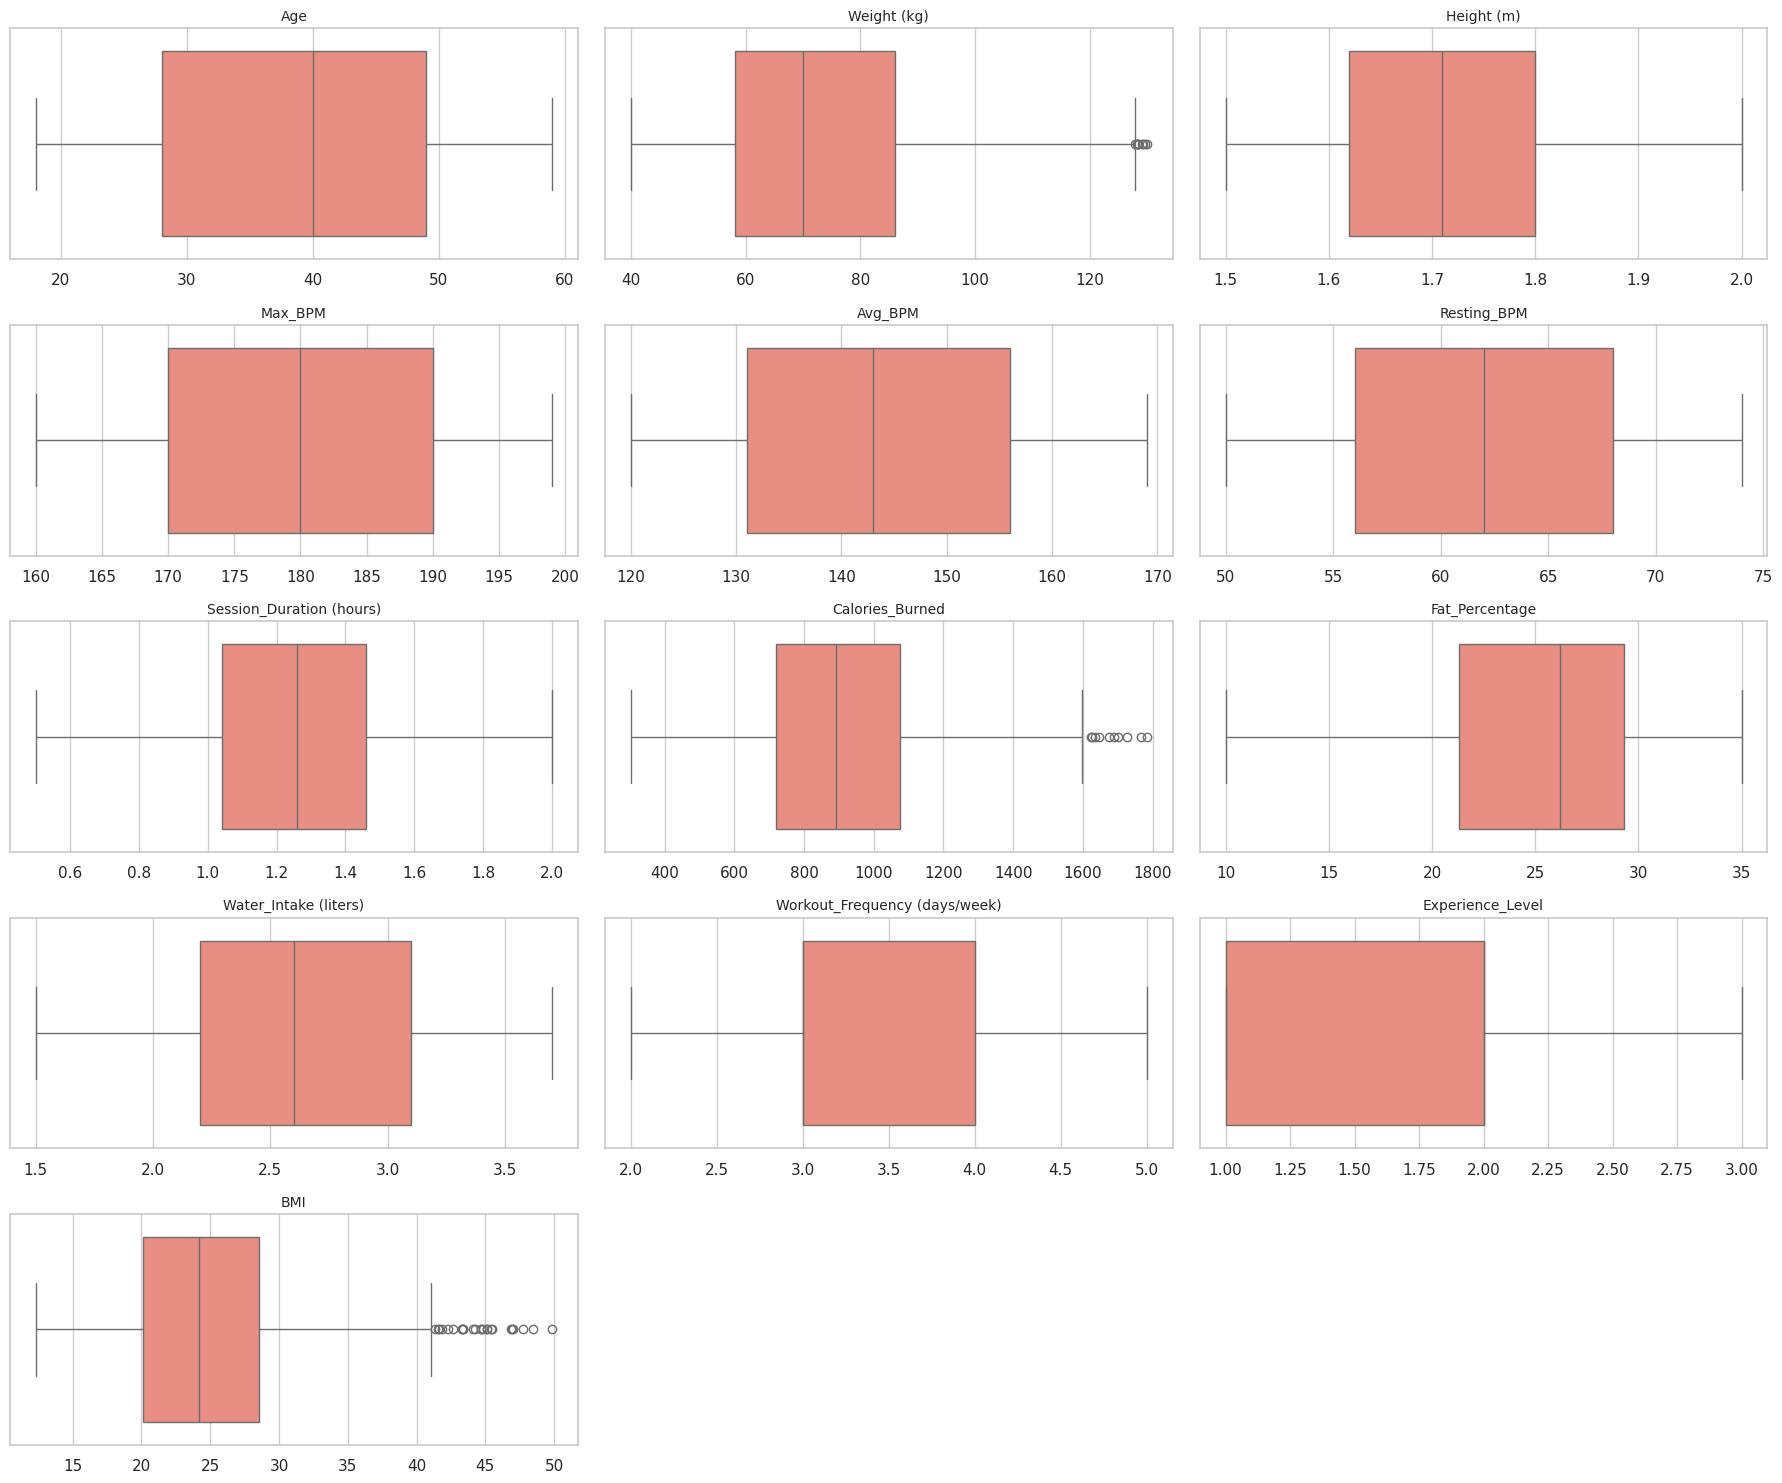

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='salmon')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

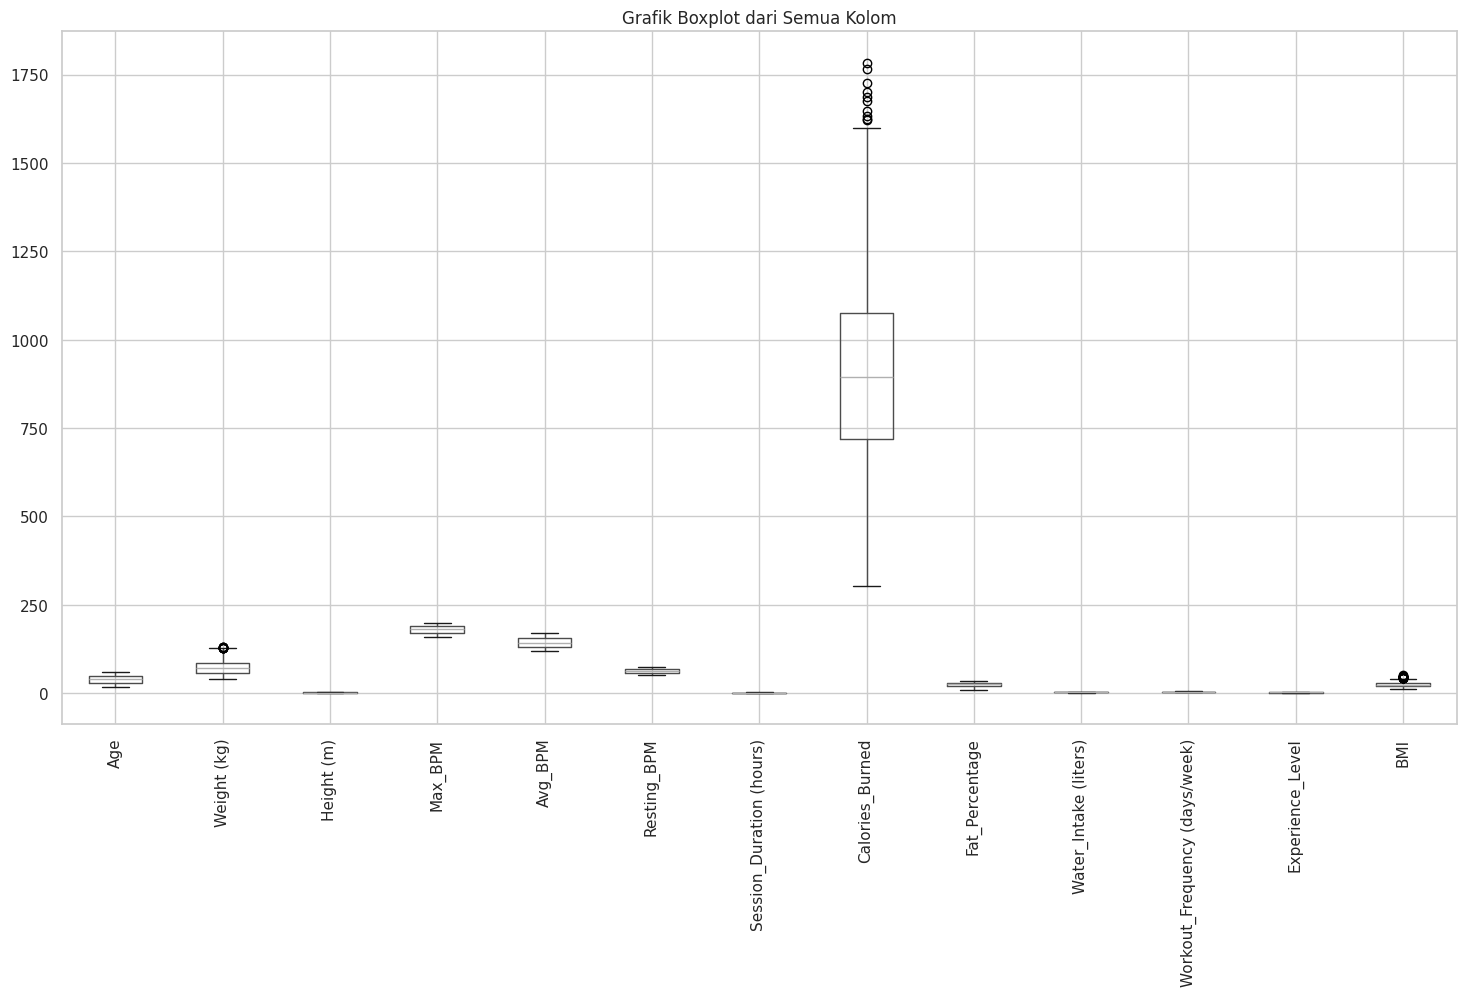

In [ ]:
plt.figure(figsize=(18, 9))
df.boxplot(rot=90)
plt.title("Grafik Boxplot dari Semua Kolom")
plt.show()

 ## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                        1.69           1313.0             3            12.6   
1                        1.30            883.0             1            33.9   
2                        1.11            677.0             0            33.4   
3                        0.59            532.0             2            28.8   
4                        0.64            556.0             2            29.2   
..                        ...              ...           ...             ...   
968                      1.57           1364.0             2            10.0   
969                      1.38           1260.0             2            25.0   
970                      1.72            929.0             0            18.8   
971                      1.10            883.0             1            28.2   
972                      0.75            542.0             2            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [ ]:
gender_mapping = {index: label for index, label in enumerate(label_encoders['Gender'].classes_)}
print("Mapping untuk kolom 'Gender':", gender_mapping)

workout_mapping = {index: label for index, label in enumerate(label_encoders['Workout_Type'].classes_)}
print("Mapping untuk kolom 'Workout_Type':", workout_mapping)

Mapping untuk kolom 'Gender': {0: 'Female', 1: 'Male'}
Mapping untuk kolom 'Workout_Type': {0: 'Cardio', 1: 'HIIT', 2: 'Strength', 3: 'Yoga'}


In [ ]:
import numpy as np

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def clean_outlier(df, kolom, metode='zscore', threshold=3):
    if metode == 'zscore':

        z_scores = np.abs((df[kolom] - df[kolom].mean()) / df[kolom].std())
        return df[z_scores < threshold]

    elif metode == 'iqr':

        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - threshold * IQR
        batas_atas = Q3 + threshold * IQR

        return df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

df = clean_outlier(df, numeric_columns, metode='zscore', threshold=2)
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [ ]:
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                      57
Height (m)                       33
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)         48
Calories_Burned                  42
Workout_Type                      0
Fat_Percentage                   54
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                              43
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

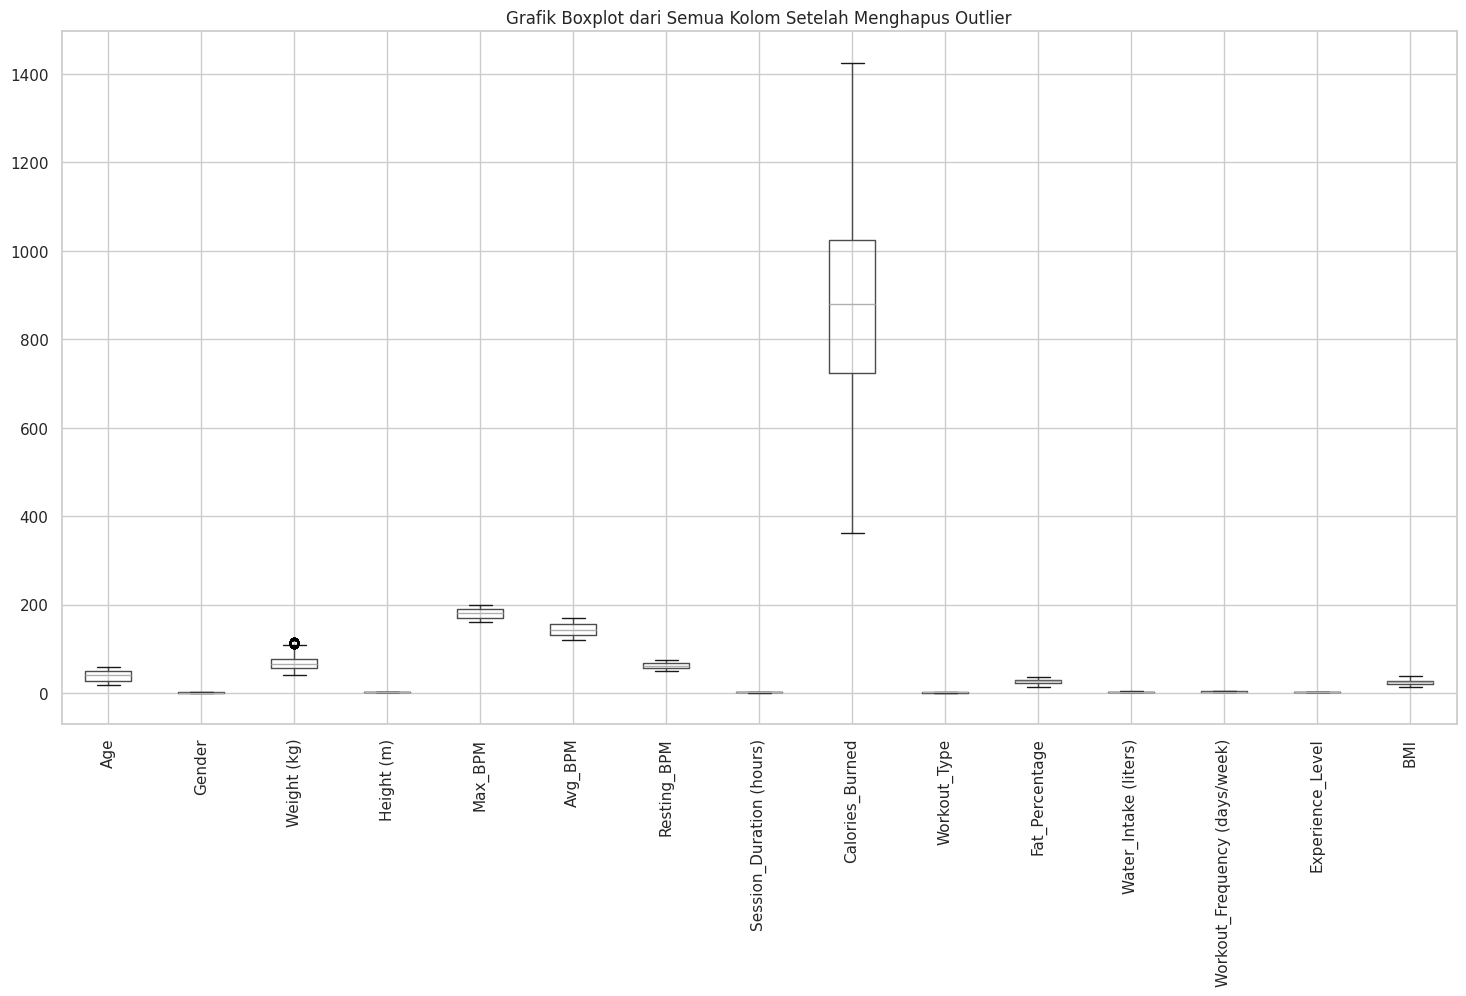

In [ ]:
plt.figure(figsize=(18, 9))
df.boxplot(rot=90)
plt.title("Grafik Boxplot dari Semua Kolom Setelah Menghapus Outlier")
plt.show()

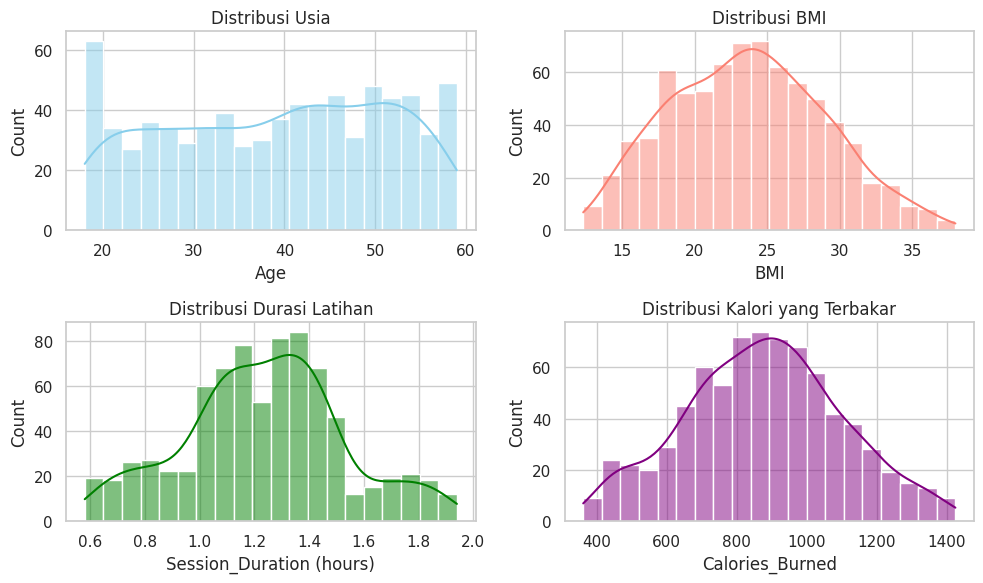

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribusi Usia")

sns.histplot(df['BMI'], bins=20, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribusi BMI")

sns.histplot(df['Session_Duration (hours)'], bins=20, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Distribusi Durasi Latihan")

sns.histplot(df['Calories_Burned'], bins=20, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribusi Kalori yang Terbakar")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

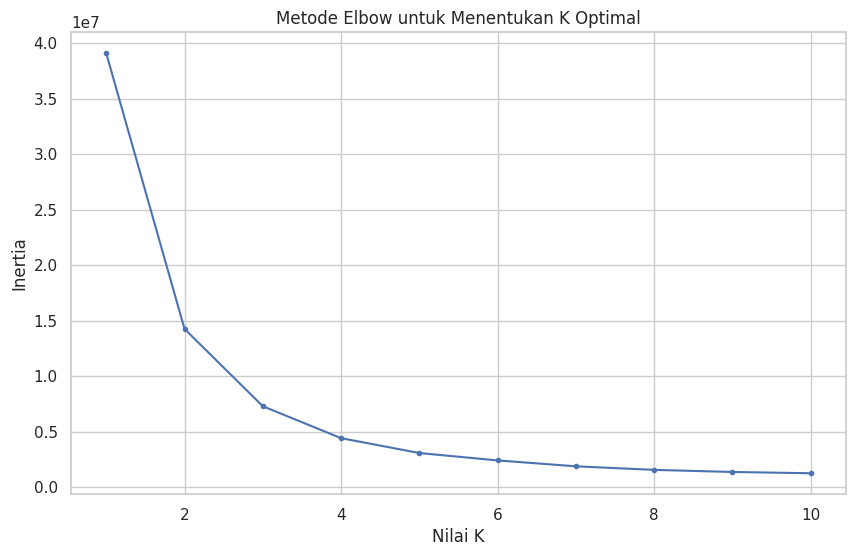

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='.')
plt.grid(True)
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_cluster = df.copy()
df_cluster['Cluster'] = kmeans.labels_
df_cluster.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Cluster  
0  30.20        1  
1  32.00        1  
2  24.71        0  
3  18.41        0  
4  14.39        0

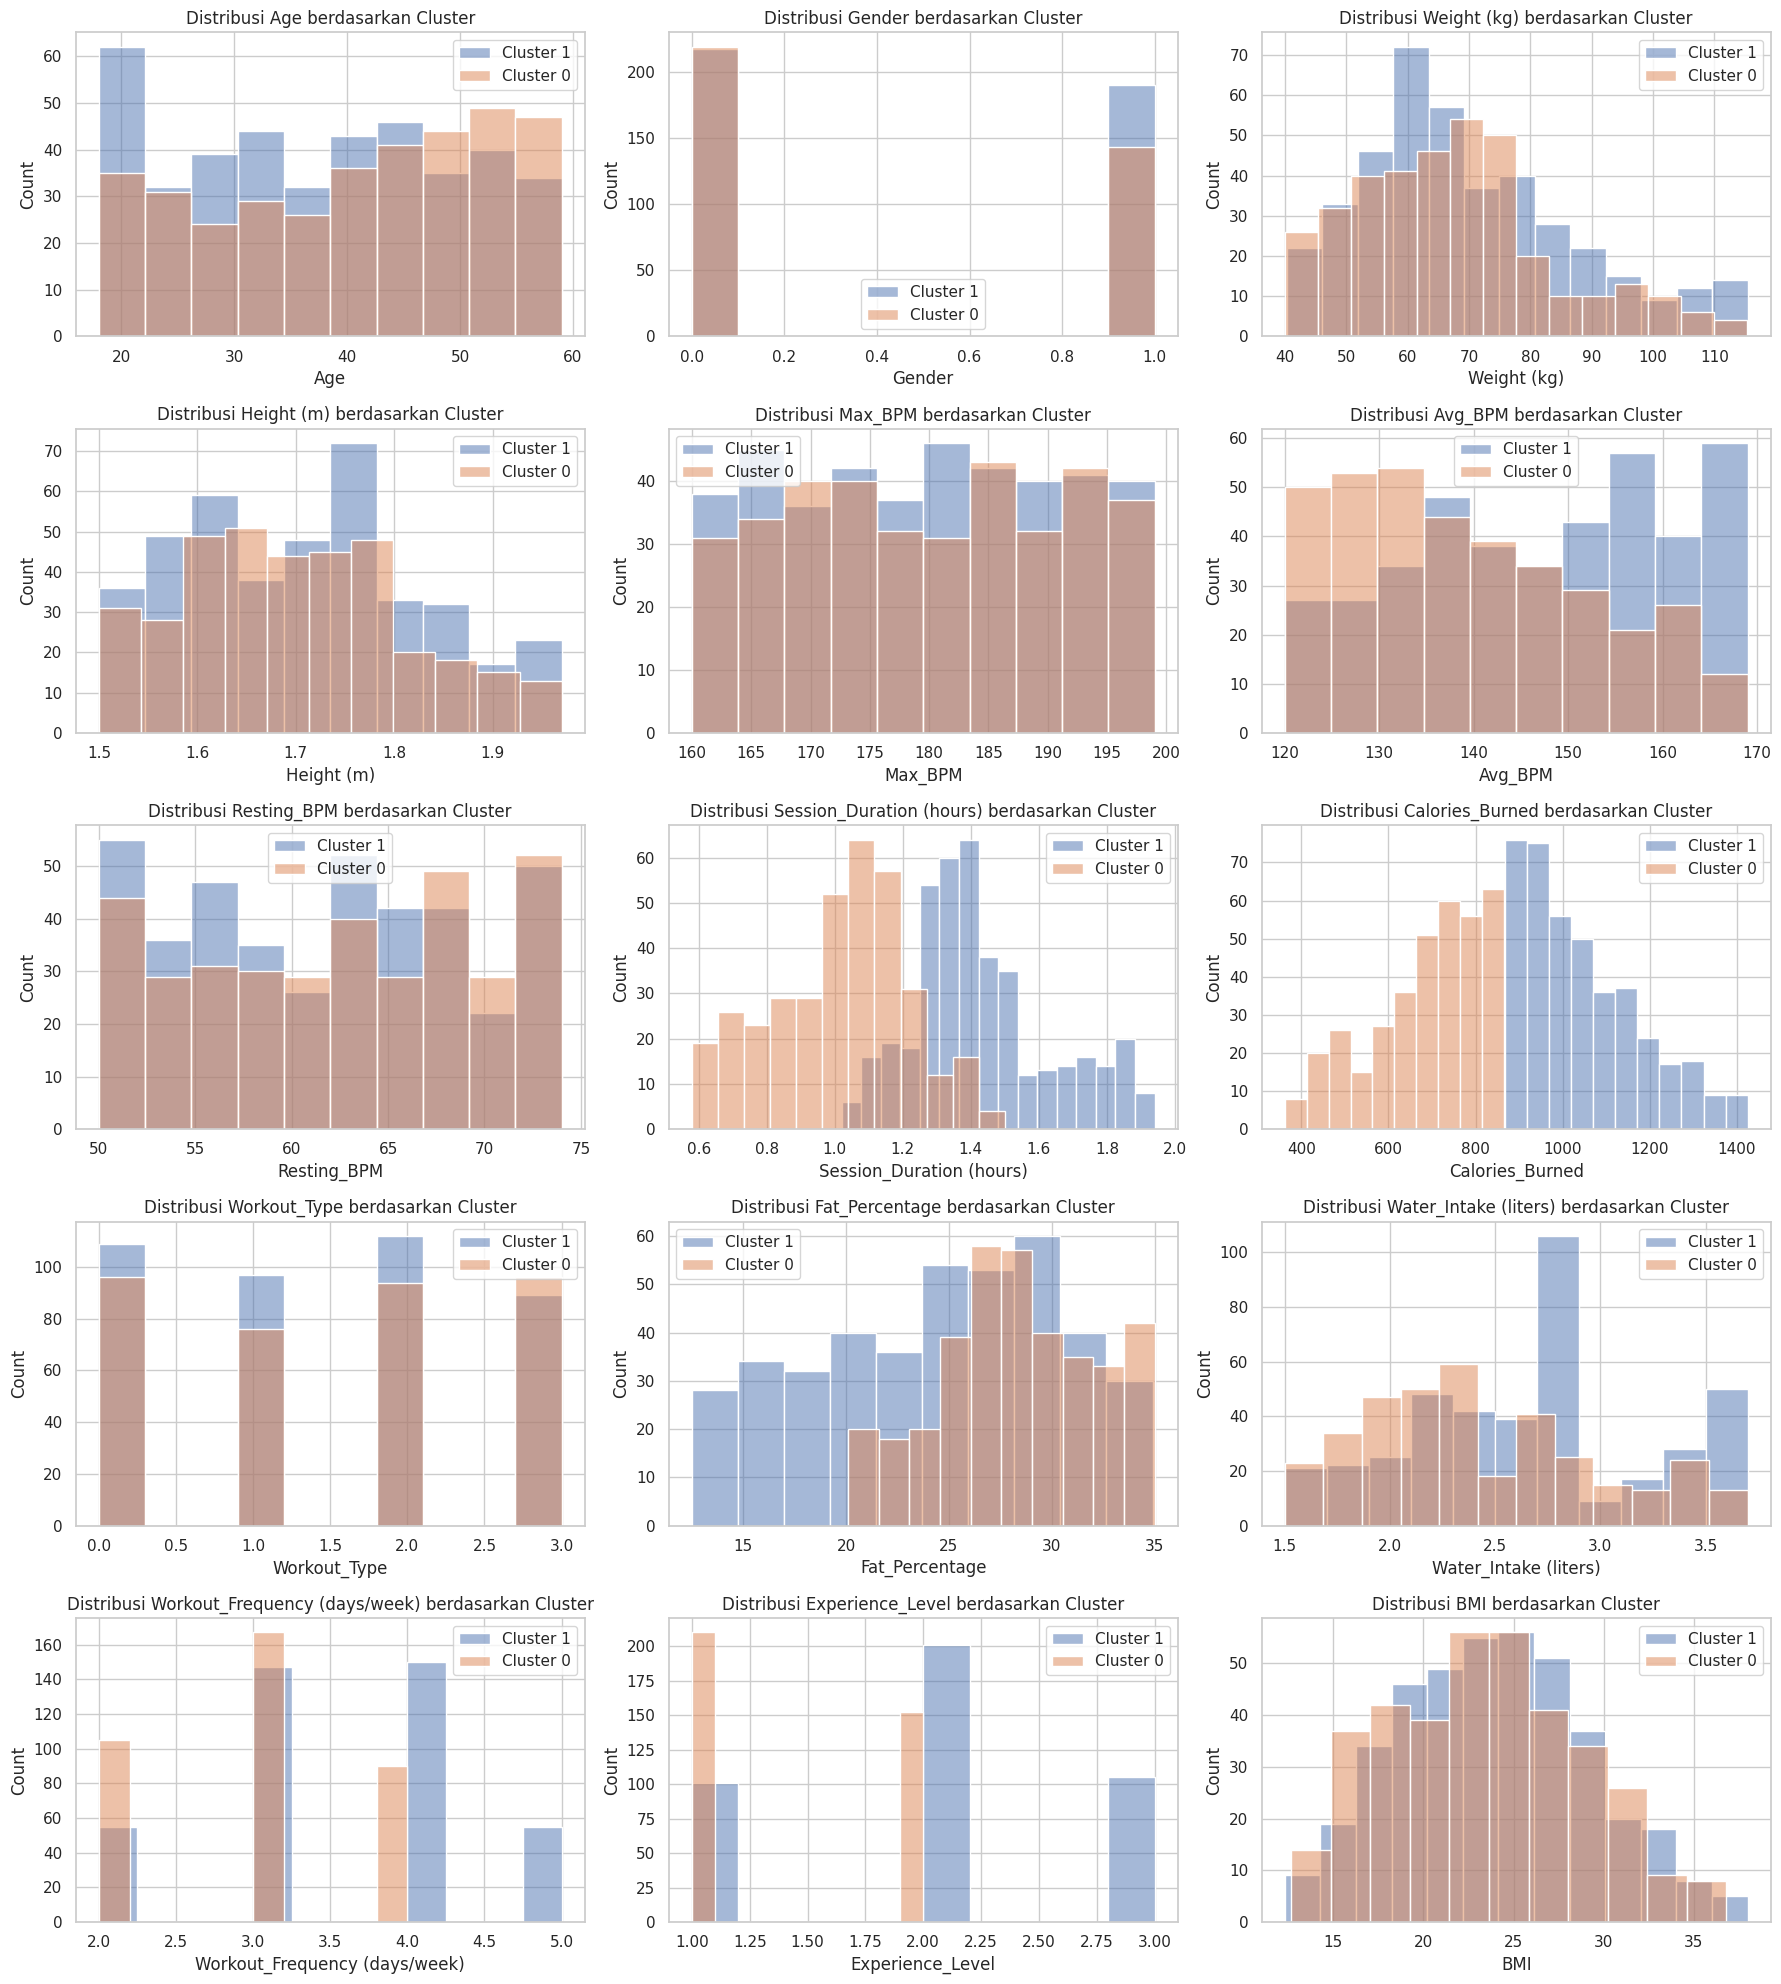

In [ ]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

axes = axes.flatten()

for i, kolom in enumerate(df.columns):
    for cluster in df_cluster['Cluster'].unique():
        sns.histplot(data=df_cluster[df_cluster['Cluster'] == cluster],
                     x=kolom,
                     label=f'Cluster {cluster}',
                     alpha=0.5,
                     ax=axes[i])
    axes[i].set_title(f'Distribusi {kolom} berdasarkan Cluster')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

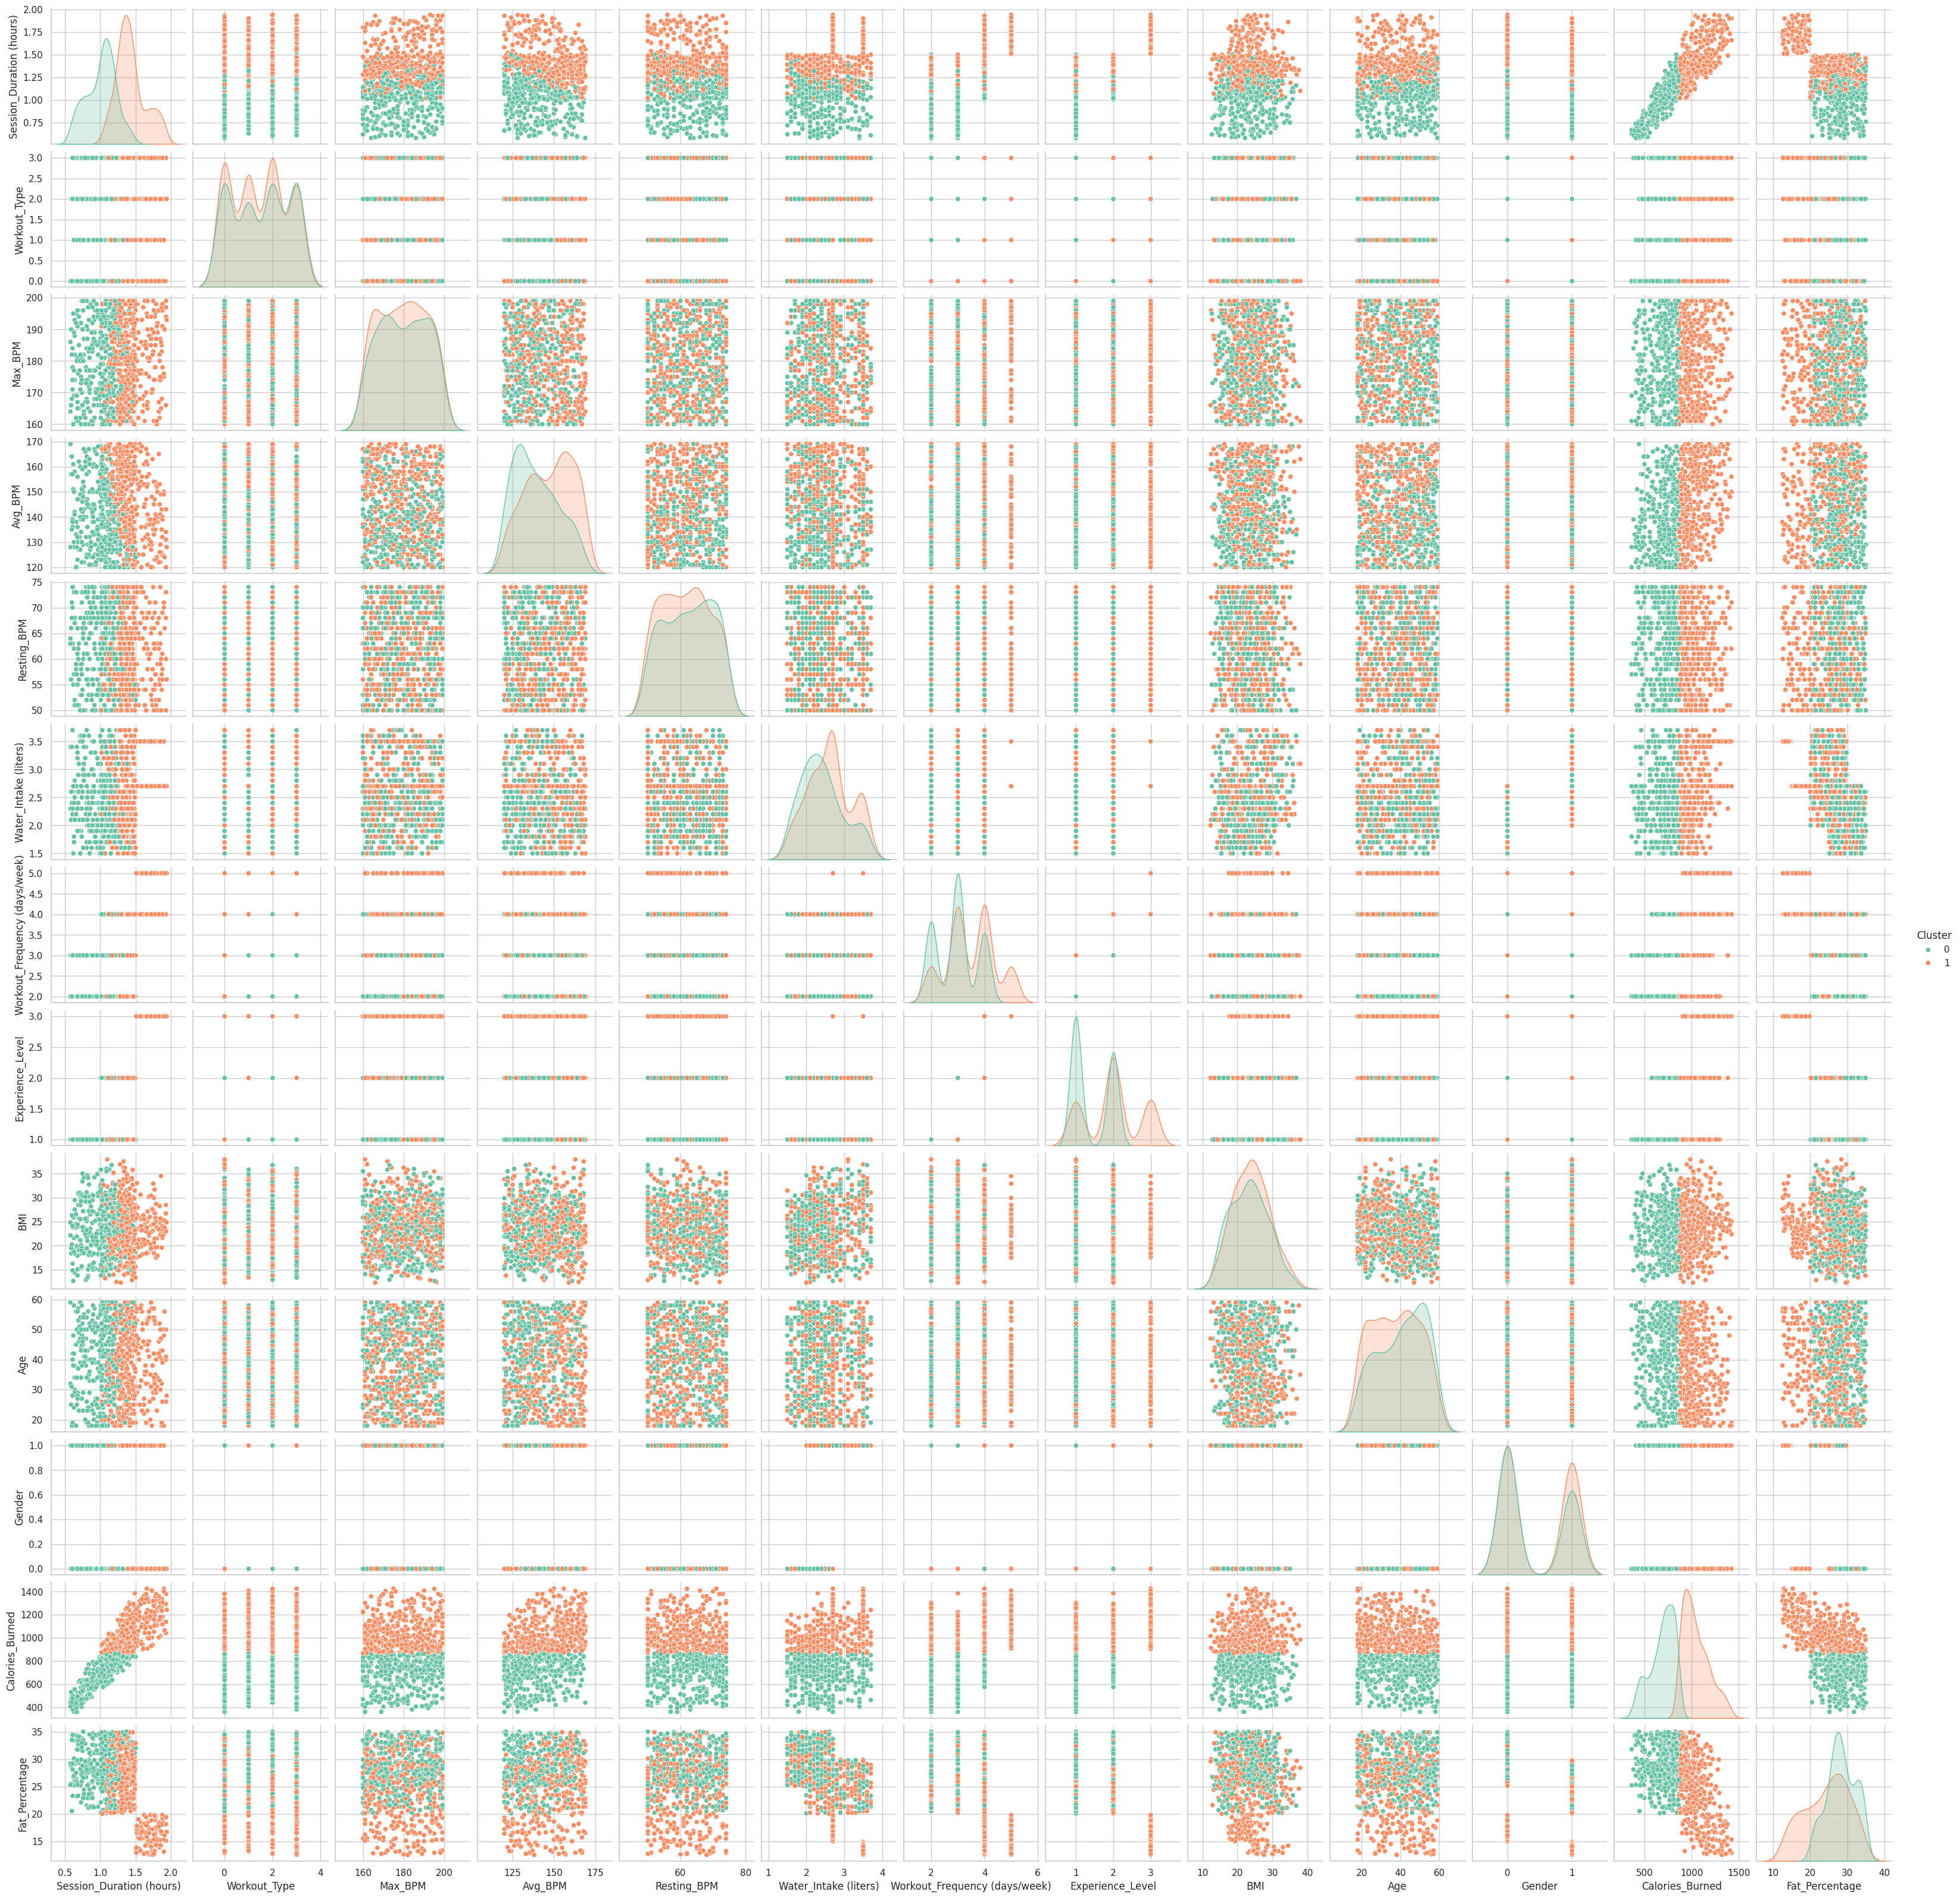

In [ ]:
kolom = ['Session_Duration (hours)', 'Workout_Type', 'Max_BPM', 'Avg_BPM',
                 'Resting_BPM', 'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                 'Experience_Level', 'BMI', 'Age', 'Gender', 'Calories_Burned', 'Fat_Percentage']
sns.pairplot(df_cluster[kolom + ['Cluster']], hue='Cluster', diag_kind='kde', palette='Set2')
plt.show()

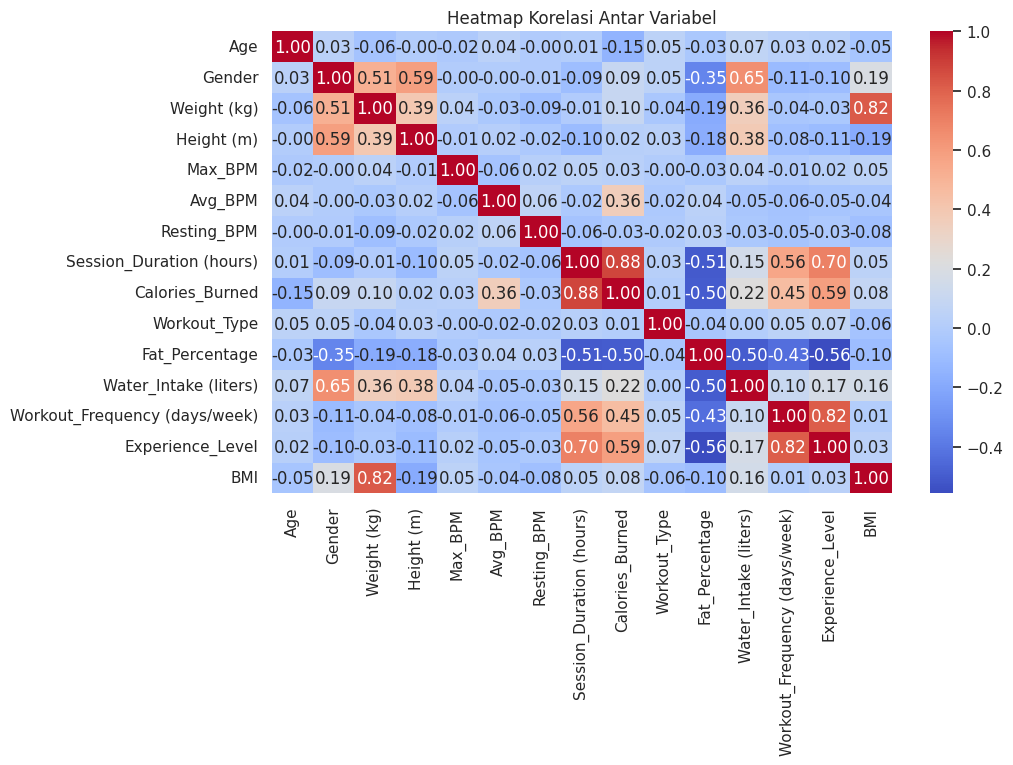

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_df = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = kmeans.labels_
pca_df.head()

PC1        PC2        PC3  Cluster
0  436.271902  15.479098  12.140409        1
1    6.023912   5.681363  11.061538        1
2 -200.508014   3.756738 -15.546123        0
3 -344.473135 -15.488296  15.703766        0
4 -320.801011 -24.103245  13.356468        0

<Axes: xlabel='PC1', ylabel='PC2'>

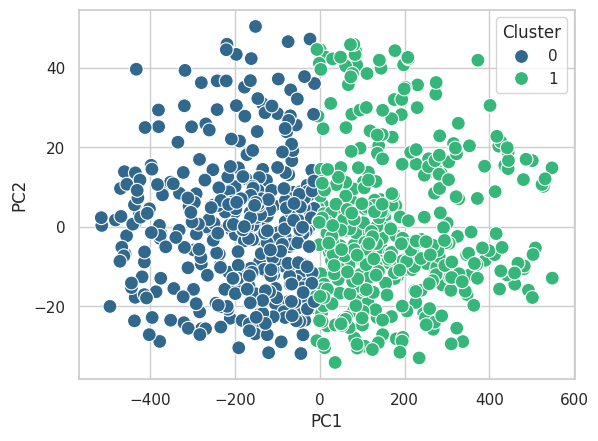

In [ ]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)

In [ ]:
siluet_skor = silhouette_score(df, kmeans.labels_)
print('Silhouette Score: ', siluet_skor)

Silhouette Score:  0.5244732669093549


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters' : range(2,8),
    'init' : ['k-means++'],
    'n_init' : ['auto'],
    'max_iter' : [100,300,500],
}

In [ ]:
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)
grid_search.fit(df)

GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++'], 'max_iter': [100, 300, 500],
                         'n_clusters': range(2, 8), 'n_init': ['auto']})

In [ ]:
best_score = -1
best_params = None

for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df)
    score = silhouette_score(df, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 'auto'}
Best Silhouette Score: 0.5244732669093549


In [ ]:
from sklearn.preprocessing import StandardScaler

bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

X = df.drop(['BMI', 'BMI_Category'], axis=1)
y = df['BMI_Category']

In [ ]:
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=["int64","float64"]).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
X

Age    Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  \
0    1.403090  1.144251     1.151199    0.046664  0.023397  0.944360   
1    0.578311 -0.873934     0.363716   -1.487605 -0.063521  0.523895   
2   -0.576380 -0.873934    -0.035902   -0.379522 -1.106533 -1.508352   
3   -1.153726  1.144251    -0.911537   -0.038573  0.892573  1.434903   
4   -0.081513  1.144251    -1.328786    0.728562  0.718738  1.014438   
..        ...       ...          ...         ...       ...       ...   
963  1.485568 -0.873934    -1.463951    0.387613  0.023397  1.154593   
967 -1.566115  1.144251    -0.805756   -0.890944 -0.671944  1.715213   
969 -1.153726  1.144251    -0.124054   -0.805707  0.371067  1.575058   
970  1.650524 -0.873934    -0.488412    0.472850  1.240243 -1.648507   
972  0.578311  1.144251     1.174706   -0.635233 -1.193450  0.173508   

     Resting_BPM  Session_Duration (hours)  Calories_Burned  Workout_Type  \
0      -0.267932                  1.554533         1.950406      1.349807   
1       0.544315                  0.222324         0.026605     -0.429116   
2      -1.080179                 -0.426701        -0.895030     -1.318577   
3      -0.809430                 -2.202981        -1.543753      0.460345   
4       0.815064                 -2.032185        -1.436378      0.460345   
..           ...                       ...              ...           ...   
963     1.491936                  0.529757         0.554532     -1.318577   
967     0.679689                 -0.392542         0.706647      1.349807   
969    -0.809430                  0.495597         1.713287      0.460345   
970    -1.215554                  1.657011         0.232407     -1.318577   
972     0.544315                 -1.656433        -1.499014      0.460345   

     Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
0         -2.526199               1.710325                       0.872202   
1          1.410587              -0.734359                       0.872202   
2          1.318174              -0.385118                       0.872202   
3          0.467977              -0.734359                      -0.286215   
4          0.541907               0.487983                      -0.286215   
..              ...                    ...                            ...   
963       -0.215878              -1.432840                      -1.444631   
967       -0.419186               1.186464                       0.872202   
969       -0.234361               0.837224                      -1.444631   
970       -1.380280               0.313363                       2.030618   
972        0.467977               1.710325                      -1.444631   

     Experience_Level  
0            1.850965  
1            0.391076  
2            0.391076  
3           -1.068814  
4           -1.068814  
..                ...  
963         -1.068814  
967          0.391076  
969         -1.068814  
970          1.850965  
972         -1.068814  

[769 rows x 14 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
intercept = logistic_model.intercept_
coefficients = logistic_model.coef_

print(f"Intercept: {intercept}")
print("\nCoefficients:")
for i, category in enumerate(logistic_model.classes_):
    print(f"For category '{category}':")
    for feature, coef in zip(X.columns, coefficients[i]):
        print(f"  {feature}: {coef}")

Intercept: [ 3.01621717 -3.11354056  1.71812836 -1.62080497]

Coefficients:
For category 'Normal Weight':
  Age: -0.0058633874202163256
  Gender: -0.25547664887024923
  Weight (kg): -2.2470604310412776
  Height (m): 1.625099199233662
  Max_BPM: 0.026170992628673517
  Avg_BPM: -0.16321930594382936
  Resting_BPM: -0.06270899084679904
  Session_Duration (hours): -0.15589321901812786
  Calories_Burned: 0.1407312445460587
  Workout_Type: 0.01083101989055112
  Fat_Percentage: -0.022322783538474805
  Water_Intake (liters): 0.057730567379875614
  Workout_Frequency (days/week): -0.1283619099765747
  Experience_Level: 0.18830066488035382
For category 'Obese':
  Age: 0.13819806909563678
  Gender: 0.14013349409391745
  Weight (kg): 6.794486780049107
  Height (m): -4.100342297390364
  Max_BPM: -0.028627815047383362
  Avg_BPM: -0.05010075173839349
  Resting_BPM: -0.08296918689816371
  Session_Duration (hours): -0.28229487850393453
  Calories_Burned: 0.34756998799944966
  Workout_Type: -0.14574037631

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[61  0  1  1]
 [ 0 10  1  0]
 [ 0  0 41  0]
 [ 4  0  0 35]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")


Accuracy: 0.9545
Precision (weighted): 0.9554
Recall (weighted): 0.9545
F1-score (weighted): 0.9542
